In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

class HyperParams:
    pass
hyperparams = HyperParams()

hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 50
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-64-aeconnect-b"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

from tensorflow.keras.optimizers import Adam
hyperparams.OPTIMIZER = Adam(0.0005,beta_1=0.9)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelB as train
import ReportsK as reports

In [4]:
##################
# MODEL DEFINITION
##################

import AEConnectionsE as model_factory

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   18496       leaky_re_lu[0][0]                
______________________________________________________________________________________________

{'name': 'Adam',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:9696
Nitid files:9696
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2309
Nitid files:2309


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/50
303/303 [==============================] - 19s 50ms/step - loss: 0.0014 - mean_absolute_error: 0.0440 - val_loss: 9.4356e-04 - val_mean_absolute_error: 0.0298
Epoch 2/50
303/303 [==============================] - 15s 48ms/step - loss: 8.0392e-04 - mean_absolute_error: 0.0257 - val_loss: 7.5705e-04 - val_mean_absolute_error: 0.0240
Epoch 3/50
303/303 [==============================] - 15s 48ms/step - loss: 7.6012e-04 - mean_absolute_error: 0.0243 - val_loss: 7.0342e-04 - val_mean_absolute_error: 0.0224
Epoch 4/50
303/303 [==============================] - 15s 48ms/step - loss: 7.4355e-04 - mean_absolute_error: 0.0238 - val_loss: 7.0457e-04 - val_mean_absolute_error: 0.0225
Epoch 5/50
303/303 [==============================] - 15s 48ms/step - loss: 7.3772e-04 - mean_absolute_error: 0.0236 - val_loss: 0.0010 - val_mean_a

Epoch 47/50
303/303 [==============================] - 15s 48ms/step - loss: 4.8333e-04 - mean_absolute_error: 0.0155 - val_loss: 6.4174e-04 - val_mean_absolute_error: 0.0204
Epoch 48/50
303/303 [==============================] - 15s 48ms/step - loss: 4.8021e-04 - mean_absolute_error: 0.0154 - val_loss: 6.9955e-04 - val_mean_absolute_error: 0.0222
Epoch 49/50
303/303 [==============================] - 15s 48ms/step - loss: 4.7474e-04 - mean_absolute_error: 0.0152 - val_loss: 6.0753e-04 - val_mean_absolute_error: 0.0193
Epoch 50/50
303/303 [==============================] - 15s 48ms/step - loss: 4.6627e-04 - mean_absolute_error: 0.0149 - val_loss: 6.2374e-04 - val_mean_absolute_error: 0.0198
Train size:9696
Valid.size:2309
--- 735.7392630577087 seconds ---


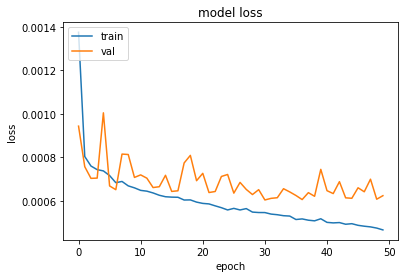

In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save('C:/Projects/VenusDenoise/saves/0100_1000-64-aeconnect-b')

INFO:tensorflow:Assets written to: C:/Projects/VenusDenoise/saves/0100_1000-64-aeconnect-b\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
